# SAMUEL ADEYEYE

### Project Definition

Create a machine learning model to predict the quality score of a given wine sample

The steps in this project are:
1. Importing the data and relevant modules
2. Check missing values, process and explore the data
3. Exploratory Data Analysis
4. Correlation analysis
5. Data fitting and transformation
6. Data modeling and predicting quality

# Import modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
%matplotlib inline

In [5]:
df = pd.read_csv('winequality.csv')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Check missing values, process and explore the data

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#Check if there is any NULL value in the dataset
df.isnull().any().any()

False

In [9]:
df.rename(columns={'fixed acidity': 'fixed_acidity', 'citric acid': 'citric_acid', 'volatile acidity': 'volatile_acidity', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

In [10]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [12]:
df['citric_acid'].unique()

array([0.  , 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29, 0.18, 0.19, 0.28,
       0.51, 0.48, 0.31, 0.21, 0.11, 0.14, 0.16, 0.24, 0.07, 0.12, 0.25,
       0.09, 0.3 , 0.2 , 0.22, 0.15, 0.43, 0.52, 0.23, 0.37, 0.26, 0.57,
       0.4 , 0.49, 0.05, 0.54, 0.64, 0.7 , 0.47, 0.44, 0.17, 0.68, 0.53,
       0.1 , 0.01, 0.55, 1.  , 0.03, 0.42, 0.33, 0.32, 0.35, 0.6 , 0.74,
       0.58, 0.5 , 0.76, 0.46, 0.45, 0.38, 0.39, 0.66, 0.62, 0.67, 0.79,
       0.63, 0.61, 0.71, 0.65, 0.59, 0.34, 0.69, 0.73, 0.72, 0.41, 0.27,
       0.75, 0.13, 0.78])

In [13]:
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Exploratory Data Analysis

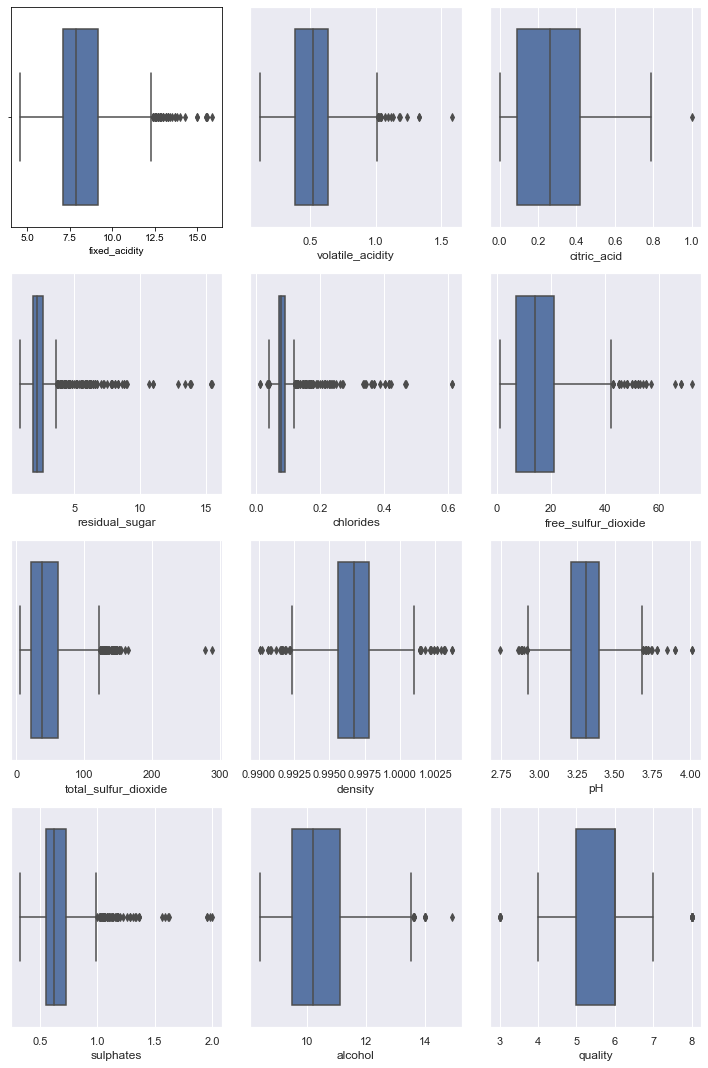

In [15]:
plt.figure(figsize=(10,15))

for pl,col in enumerate(list(df.columns.values)):
    plt.subplot(4,3,pl+1)
    sns.set()
    sns.boxplot(col,data=df)
    plt.tight_layout()

From the various box plots above we see that most of the data is right skewed. Focusing on Fixed Acidity we see that 50% of the data is roughly between 7.5 and 8.0.

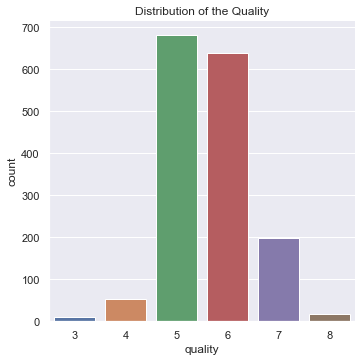

In [16]:
sns.catplot(x='quality', data=df, kind='count');
plt.title('Distribution of the Quality');

We see in the graph above that the quality of wine that appears most in the data set is 5

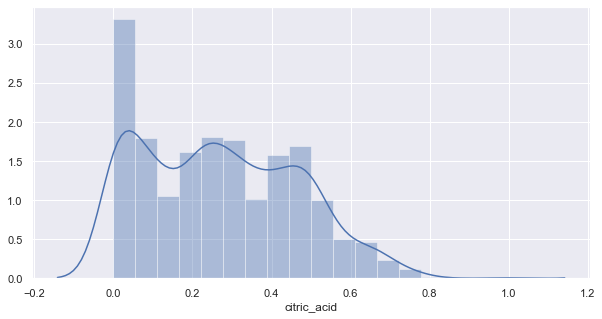

In [17]:
plt.figure(figsize=(10, 5))
sns.distplot(df["citric_acid"])

# CORRELATION ANALYSIS

- PAIR PLOT
- BOX PLOTS,
- VIOLIN PLOTS
- SWARM LOTS
- LM PLOTS
- SCATTER DIAGRAMS
- DATA DISTRIBUTION PLOTS
- DATA ANALYSIS

In [18]:
df.corr()['quality'].sort_values()

volatile_acidity       -0.390558
total_sulfur_dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free_sulfur_dioxide    -0.050656
residual_sugar          0.013732
fixed_acidity           0.124052
citric_acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [19]:
df_Cor = df.drop(['volatile_acidity', 'density', 'pH', 'chlorides','total_sulfur_dioxide', 'free_sulfur_dioxide'], axis=1)

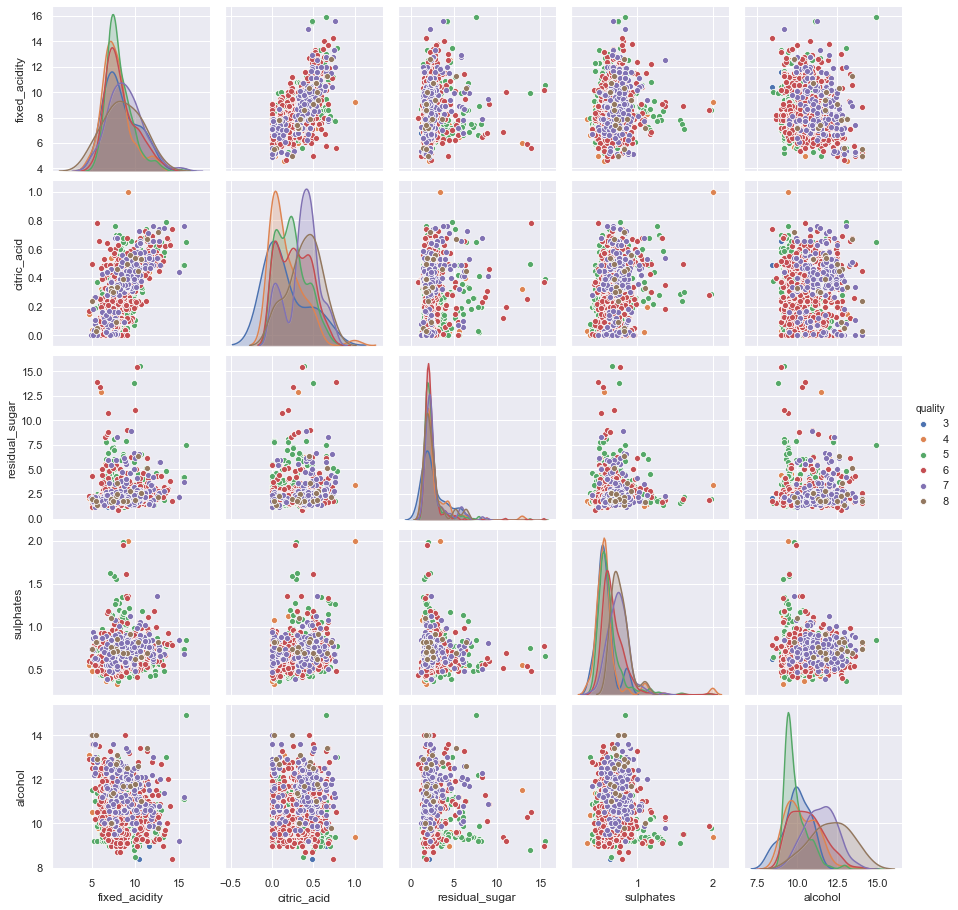

In [20]:
sns.pairplot(df_Cor,hue = 'quality');

Focusing on the features in the data set that give a postive correlation we see both distribution of single variables on the diagonal with respect to the quality (denoted by the various colours) and relationships between two variables with respect to the quality(denoted by the various colours)

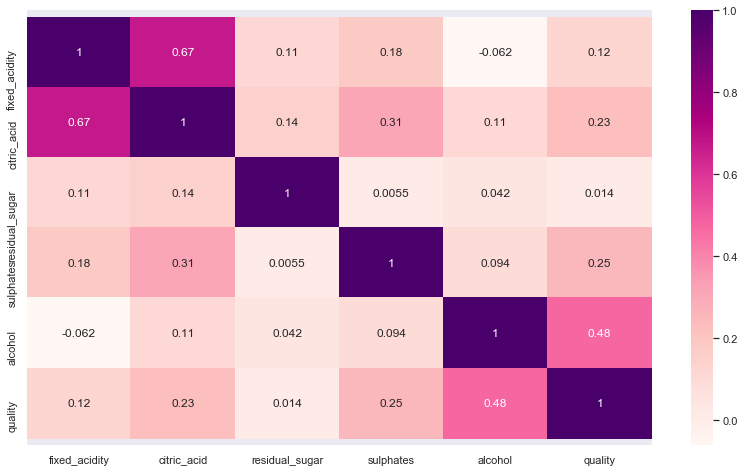

In [21]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(df_Cor.corr(), annot = True, cmap='RdPu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.1, top - 0.1);

From the correlation analysis done above we see that the attributes in the dataset that have a positive correlation with the quality are:

- residual_sugar          0.013732
- fixed_acidity           0.124052
- citric_acid             0.226373
- sulphates               0.251397
- alcohol                 0.476166

Below we will analyse each attribute

In [22]:
df['residual_sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual_sugar, dtype: float64

In [23]:
df['fixed_acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed_acidity, dtype: float64

In [24]:
df['citric_acid'].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric_acid, dtype: float64

In [25]:
df['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [26]:
df['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [27]:
df.iloc[:,:11].head() #Removing the quality column

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


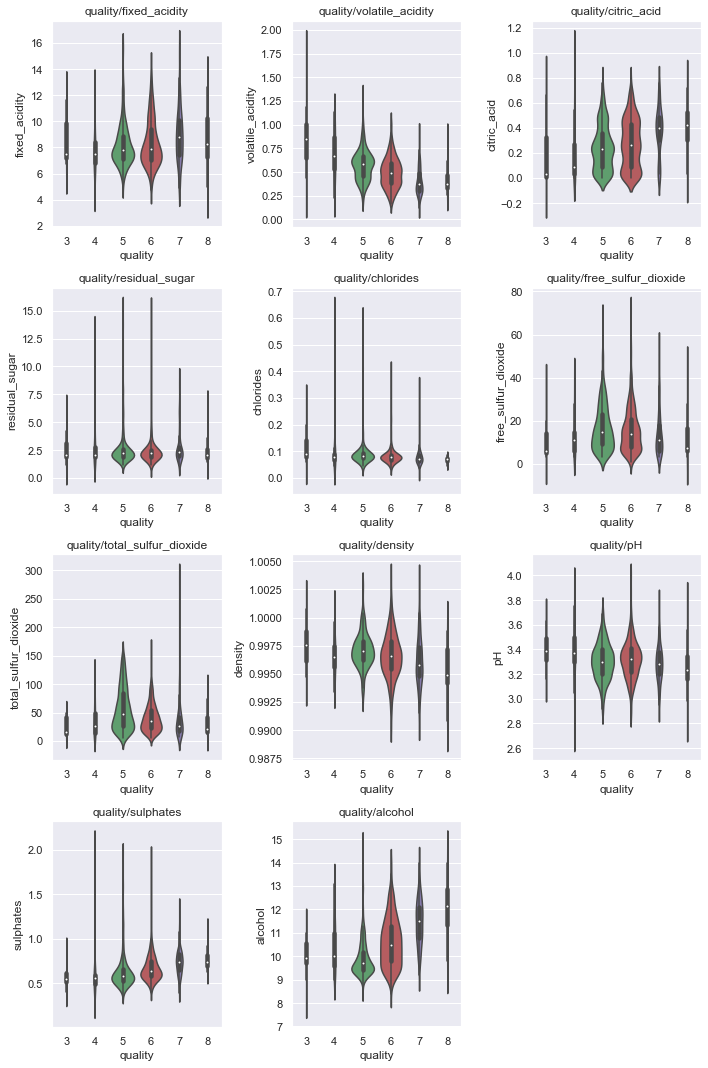

In [28]:
plt.figure(figsize=(10,15))

for pl,col in enumerate(list(df.iloc[:,:11].columns.values)):
    plt.subplot(4,3,pl+1)
    sns.violinplot(y= df[col],x='quality',data=df, scale='count')
    plt.title(f'quality/{col}')
    plt.tight_layout()

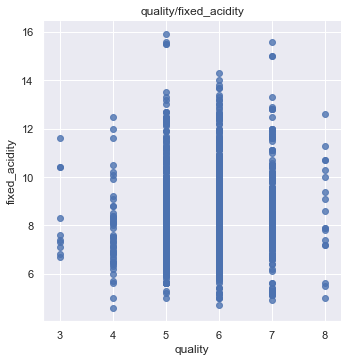

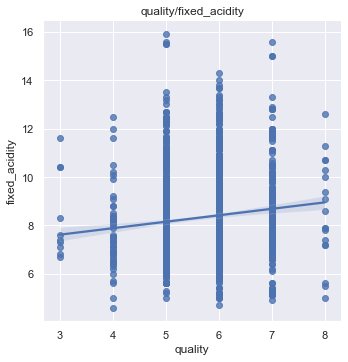

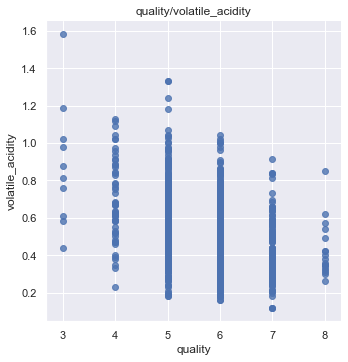

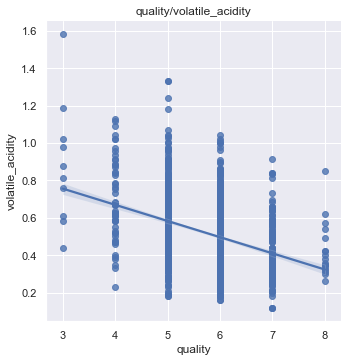

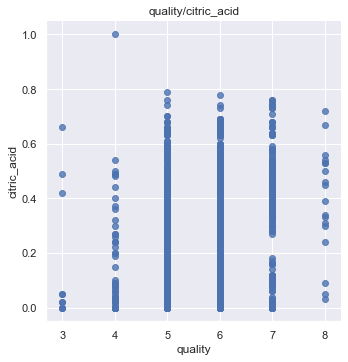

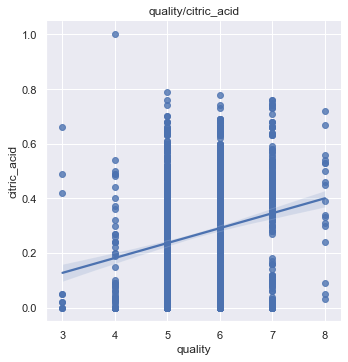

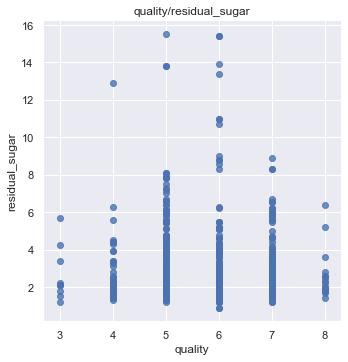

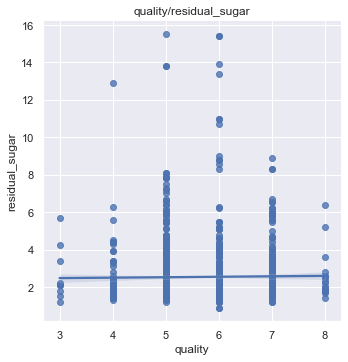

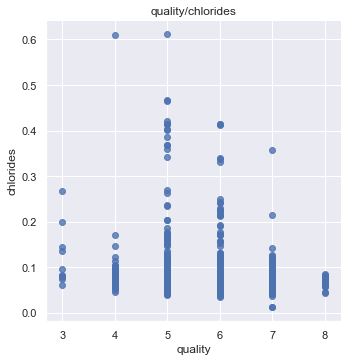

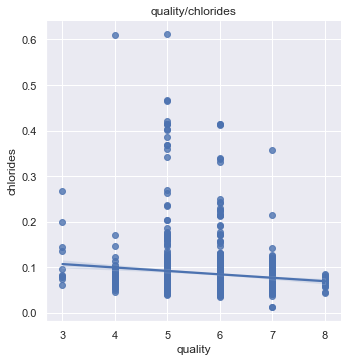

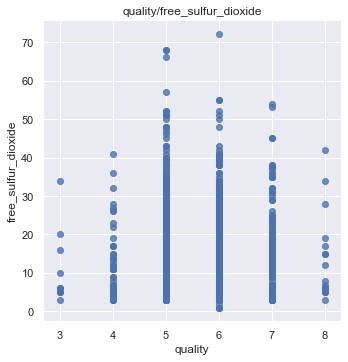

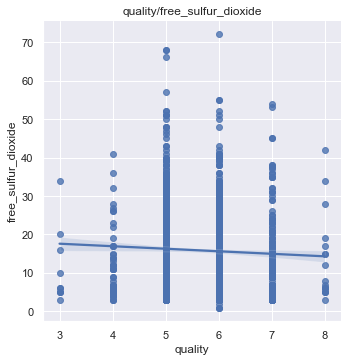

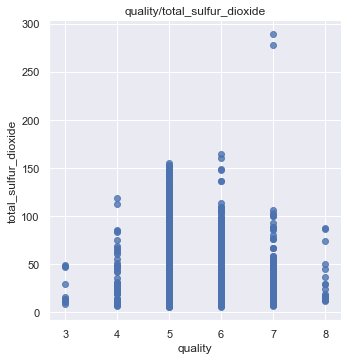

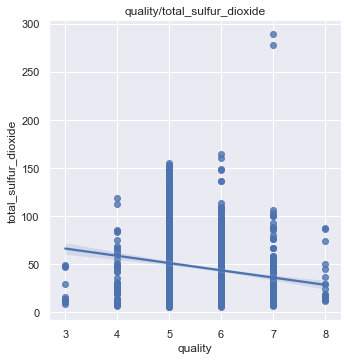

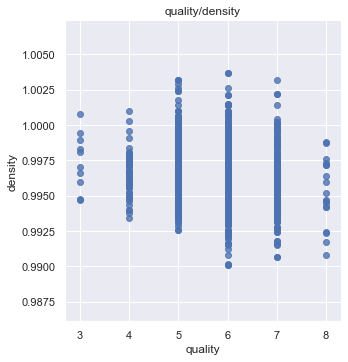

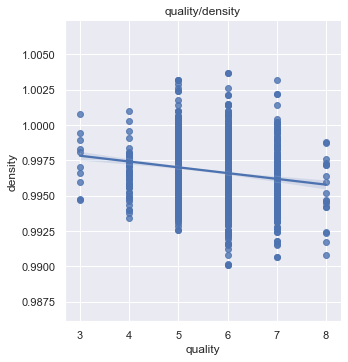

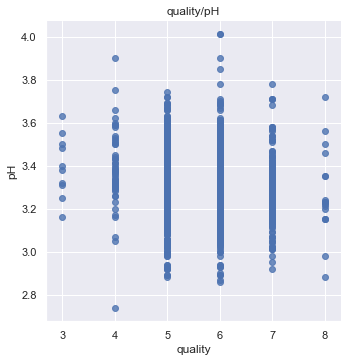

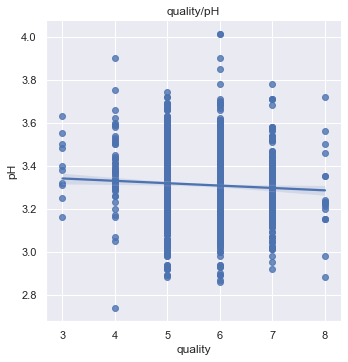

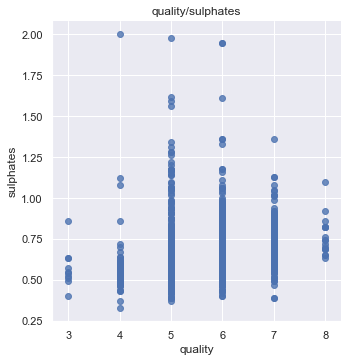

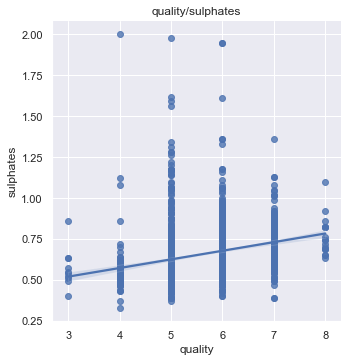

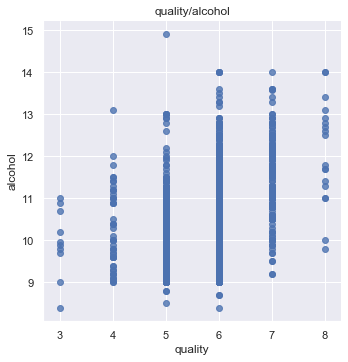

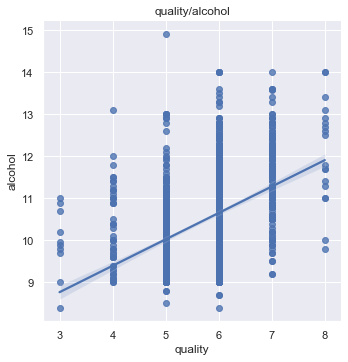

In [29]:
#This plots a 2d scatter plot with a regression line. Easily showing the correlation, distribution, and outliers!

for col in (df.iloc[:,:11].columns.values):
 
    sns.lmplot(x='quality',y=col,data=df, fit_reg=False)
  
    plt.title(f'quality/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close() 
    
    sns.lmplot(x='quality',y=col,data=df)
  
    plt.title(f'quality/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close() 
    
    print('   ')

From both the violin plot and the lm plot above we can easily see the correlation between the different attributes and the quality.

In [30]:
condition = [(df['quality']>6),(df['quality']<=4)]#Setting the condition for good and bad ratings

rating = ['good','bad']

In [31]:
df['rating'] = np.select(condition,rating,default='average')
df.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

In [32]:
df.head(25)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,average


In [33]:
df[[('rating'),('quality')]].head(25)

,rating,quality
0,average,5
1,average,5
2,average,5
3,average,6
4,average,5
5,average,5
6,average,5
7,good,7
8,good,7
9,average,5


In [34]:
df.groupby('rating')['quality'].value_counts()

rating   quality
average  5          681
         6          638
bad      4           53
         3           10
good     7          199
         8           18
Name: quality, dtype: int64

Based on the ratio of good, average, and bad wine samples in the data set and the total number of samples being 1599; the percentage of these ratings are as follows:

- good: 14%
- average: 82%
- bad: 4%

# Data fitting and transformation

In [35]:
#This changes the quality from numbers to ratings between good and bad

bins = (2, 4, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [36]:
df.head(25)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,good,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,good,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,good,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,good,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,good,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,good,average


In [37]:
df[[('rating'),('quality')]].head(25)

,rating,quality
0,average,good
1,average,good
2,average,good
3,average,good
4,average,good
5,average,good
6,average,good
7,good,good
8,good,good
9,average,good


In [38]:
#This basically maps all good values to 1 and all bad values to 0 in the quality column

df_map = np.array(df['quality'])

df_map = pd.DataFrame(df_map)

df['quality'] = df_map.apply(lambda x: x.map({'good':1,'bad':0})) 

In [39]:
df.head(30)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1,average


In [40]:
df[[('rating'),('quality')]].head(25)

,rating,quality
0,average,1
1,average,1
2,average,1
3,average,1
4,average,1
5,average,1
6,average,1
7,good,1
8,good,1
9,average,1


In [41]:
#Setting the values of X and Y

X =  df[['alcohol','density','sulphates','residual_sugar','fixed_acidity','citric_acid']]
y =  df['quality']

- X_train is training data for x
- X_test is testing data for x
- y_train is training data for y
- y_test is testing data for y

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [43]:
X_train.shape, X_test.shape

((1199, 6), (400, 6))

In [44]:
y_train.shape, y_test.shape

((1199,), (400,))

In [45]:
stds= StandardScaler()

X_train= stds.fit_transform(X_train)
X_test = stds.fit_transform(X_test)

We use StandardScaler library for feature scaling based on standard normal distribution where the mean is usually 0 and the standard deviation is usually 1

# Data modeling and predicting quality

- LOGISTIC REGRESSION
- RANDOM FOREST
- GAUSSIAN NORMAL DISTRIBUTION
- SUPPORT VECTOR CLASSIFIER
- DESCISION TREE
- STOCHASTIC GRADIENT DESCENT

In [46]:
#The functions below will be used to measure the accuracy of the model

def generateClassificationReport_Train(y_true,y_pred):
    '''Train data accuracy tester'''
    print(classification_report(y_true,y_pred));
    print(confusion_matrix(y_true,y_pred));
    print('\n\nTrain Accuracy is: ',
          round(100*accuracy_score(y_true,y_pred),3),'%\n');
    
def generateClassificationReport_Test(y_true,y_pred):
    '''Test data accuracy tester'''
    print(classification_report(y_true,y_pred));
    print(confusion_matrix(y_true,y_pred));
    print('\n\nTest Accuracy is: ',
          round(100*accuracy_score(y_true,y_pred),3),'%\n');

Both the train and test data will be passed to the models. This is done to check how accurate the models are.

# LOGISTIC REGRESSION

In [47]:
#LOGISTIC REGRESSION

logr = LogisticRegression(max_iter=1000);
logr.fit(X_train,y_train);

In [48]:
#TRAIN DATA

y_train_pred = logr.predict(X_train)
generateClassificationReport_Train(y_train,y_train_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.96      1.00      0.98      1155

    accuracy                           0.96      1199
   macro avg       0.48      0.50      0.49      1199
weighted avg       0.93      0.96      0.95      1199

[[   0   44]
 [   0 1155]]


Train Accuracy is:  96.33 %



C:\Users\user222\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
#TEST DATA

y_test_pred = logr.predict(X_test)
generateClassificationReport_Test(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.95      1.00      0.98       381

    accuracy                           0.95       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.91      0.95      0.93       400

[[  0  19]
 [  0 381]]


Test Accuracy is:  95.25 %



C:\Users\user222\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RANDOM FOREST

In [50]:
#RANDOM FOREST

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train);

In [51]:
#TRAIN DATA

y_train_pred = rfc.predict(X_train)
generateClassificationReport_Train(y_train,y_train_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00      1155

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

[[  44    0]
 [   0 1155]]


Train Accuracy is:  100.0 %



In [52]:
#TEST DATA

y_test_pred = rfc.predict(X_test);
generateClassificationReport_Test(y_test,y_test_pred);

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.95      1.00      0.98       381

    accuracy                           0.95       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.91      0.95      0.93       400

[[  0  19]
 [  0 381]]


Test Accuracy is:  95.25 %



C:\Users\user222\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GAUSSIAN NORMAL DISTRIBUTION

In [53]:
#GAUSSIAN NORMAL DISTRIBUTION 

gnd = GaussianNB()
gnd.fit(X_train,y_train);

In [54]:
#TRAIN DATA

y_train_pred = gnd.predict(X_train)
generateClassificationReport_Train(y_train,y_train_pred)

              precision    recall  f1-score   support

           0       0.08      0.05      0.06        44
           1       0.96      0.98      0.97      1155

    accuracy                           0.95      1199
   macro avg       0.52      0.51      0.52      1199
weighted avg       0.93      0.95      0.94      1199

[[   2   42]
 [  22 1133]]


Train Accuracy is:  94.662 %



In [59]:
#TEST DATA

y_test_pred = gnd.predict(X_test)
generateClassificationReport_Test(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.95      0.98      0.97       381

    accuracy                           0.93       400
   macro avg       0.48      0.49      0.48       400
weighted avg       0.91      0.93      0.92       400

[[  0  19]
 [  8 373]]


Test Accuracy is:  93.25 %



# SUPPORT VECTOR CLASSIFIER

In [55]:
#SUPPORT VECTOR CLASSIFIER

svc = SVC()
svc.fit(X_train,y_train);

In [57]:
#TRAIN DATA

y_train_pred = svc.predict(X_train)
generateClassificationReport_Train(y_train,y_train_pred)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        44
           1       0.96      1.00      0.98      1155

    accuracy                           0.96      1199
   macro avg       0.98      0.51      0.51      1199
weighted avg       0.97      0.96      0.95      1199

[[   1   43]
 [   0 1155]]


Train Accuracy is:  96.414 %



In [58]:
#TEST DATA

y_test_pred = svc.predict(X_test)
generateClassificationReport_Test(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.95      1.00      0.98       381

    accuracy                           0.95       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.91      0.95      0.93       400

[[  0  19]
 [  0 381]]


Test Accuracy is:  95.25 %



C:\Users\user222\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DESCISION TREE

In [60]:
#DESCISION TREE

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train);

In [61]:
#TRAIN DATA

y_train_pred = dtc.predict(X_train)
generateClassificationReport_Train(y_train,y_train_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00      1155

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

[[  44    0]
 [   0 1155]]


Train Accuracy is:  100.0 %



In [62]:
#TEST DATA

y_test_pred = dtc.predict(X_test)
generateClassificationReport_Test(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.29      0.11      0.15        19
           1       0.96      0.99      0.97       381

    accuracy                           0.94       400
   macro avg       0.62      0.55      0.56       400
weighted avg       0.92      0.94      0.93       400

[[  2  17]
 [  5 376]]


Test Accuracy is:  94.5 %



# STOCHASTIC GRADIENT DESCENT

In [63]:
#STOCHASTIC GRADIENT DESCENT

sgd = SGDClassifier()
sgd.fit(X_train, y_train);

In [64]:
#TRAIN DATA

y_train_pred = sgd.predict(X_train)
generateClassificationReport_Train(y_train,y_train_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.96      1.00      0.98      1155

    accuracy                           0.96      1199
   macro avg       0.48      0.50      0.49      1199
weighted avg       0.93      0.96      0.95      1199

[[   0   44]
 [   0 1155]]


Train Accuracy is:  96.33 %



C:\Users\user222\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
#TEST DATA

y_test_pred = sgd.predict(X_test)
generateClassificationReport_Test(y_test,y_test_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.95      1.00      0.98       381

    accuracy                           0.95       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.91      0.95      0.93       400

[[  0  19]
 [  0 381]]


Test Accuracy is:  95.25 %



C:\Users\user222\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# EVALUATION

We see that four of the models we used (Logistic Regression, Random Forest, Support Vector Classifier, and Stochastic Gradiant Descent) gave the same accuracy score of 95.25% while Gaussian Normal Distribution and Decision Tree models gave accuracy score of 93.25% and 94.5%, repectively. 

IMPROVING THE MODEL
- Check other classification models
- Do some feature engineering/featuring dropping
- Hyperparameter Tuning